In [1]:
#Importing all the necessary libraries required for the analysis 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data
spam_df=pd.read_csv("C:/Users/Kankana Ghosh/Desktop/Dataset/spam1.csv",encoding="Latin1")
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"Go until jurong point, crazy.. Available only ...",ham,NaN,NaN,NaN
1,Ok lar... Joking wif u oni...,ham,NaN,NaN,NaN
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,NaN,NaN,NaN
3,U dun say so early hor... U c already then say...,ham,NaN,NaN,NaN
4,"Nah I don't think he goes to usf, he lives aro...",ham,NaN,NaN,NaN


In [3]:
row,column=spam_df.shape
print(f"The dataset contains {row} rows and {column} columns.")

The dataset contains 5572 rows and 5 columns.


In [4]:
spam_df.info
(spam_df.isnull()).sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
# Check the column names to verify if they exist in the DataFrame
spam_df = spam_df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
spam_df.head()

,v1,v2
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [6]:
spam_df = spam_df.rename(columns={'v1':'Text','v2':'label'})
spam_df['label_enc'] = spam_df['label'].map({'ham':0,'spam':1})
spam_df.head()

,Text,label,label_enc
0,"Go until jurong point, crazy.. Available only ...",ham,0
1,Ok lar... Joking wif u oni...,ham,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,1
3,U dun say so early hor... U c already then say...,ham,0
4,"Nah I don't think he goes to usf, he lives aro...",ham,0


In [7]:
# Reorder columns to have 'Text', 'label', 'label_enc'
spam_df = spam_df[['Text', 'label', 'label_enc']]
spam_df.head()

,Text,label,label_enc
0,"Go until jurong point, crazy.. Available only ...",ham,0
1,Ok lar... Joking wif u oni...,ham,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,1
3,U dun say so early hor... U c already then say...,ham,0
4,"Nah I don't think he goes to usf, he lives aro...",ham,0


In [8]:
#Number of Spam SMS
print("Number of Spam SMS:",sum(spam_df['label_enc']==1))
print("Percentage of Spam SMS:",round((sum(spam_df['label_enc']==1)/5572)*100,3),"%")

Number of Spam SMS: 747
Percentage of Spam SMS: 13.406 %


In [9]:
#Number of Ham SMS
print("Number of Ham SMS:",sum(spam_df['label_enc']==0))
print("Percentage of Ham SMS:",round((sum(spam_df['label_enc']==0)/5572)*100,3),"%")

Number of Ham SMS: 4825
Percentage of Ham SMS: 86.594 %


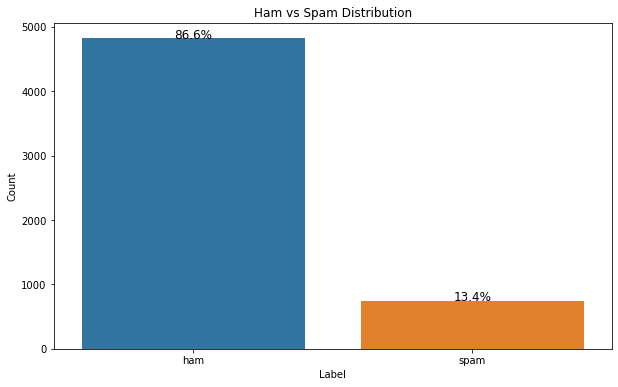

In [10]:
# Set the size of the figure
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create the countplot
sns.countplot(x=spam_df['label'])

# Add percentage annotations
total = len(spam_df['label'])
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 3  # Adjust the vertical position of the percentage text
    plt.annotate(percentage, (x, y), ha='center', fontsize=12)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Ham vs Spam Distribution')

# Show the plot
plt.show()

In [11]:
# Finding Total no of unique words in corpus
s = set()
for sent in spam_df['Text']:
    for word in sent.split():
        s.add(word)
total_words_length=len(s)
print("The total number of unique words is:",total_words_length)

The total number of unique words is: 15585


In [12]:
# Iterate over each row
w=[]
for index, row in spam_df.iterrows():
    # Split the row into words using whitespace as delimiter
    words = row['Text'].split()
    # Count the number of words
    word_count = len(words)
    w.append(word_count)

In [13]:
spam_df['Word_Counts']=w

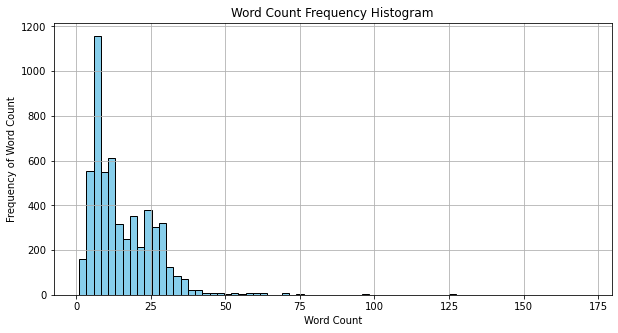

In [14]:
from collections import Counter

# Set the size of the plot
plt.figure(figsize=(10, 5))

# Create a Counter object to count the frequency of each word count
word_count_freq = Counter(w)

# Convert the Counter object to a DataFrame for easy plotting
word_count_df = pd.DataFrame.from_dict(word_count_freq, orient='index').reset_index()
word_count_df.columns = ['Word_Count', 'Frequency']

# Plot the histogram
plt.hist(w, bins=70, color='skyblue', edgecolor='black')
plt.xlabel('Word Count')
plt.ylabel('Frequency of Word Count')
plt.title('Word Count Frequency Histogram')
plt.grid(True)
plt.show()

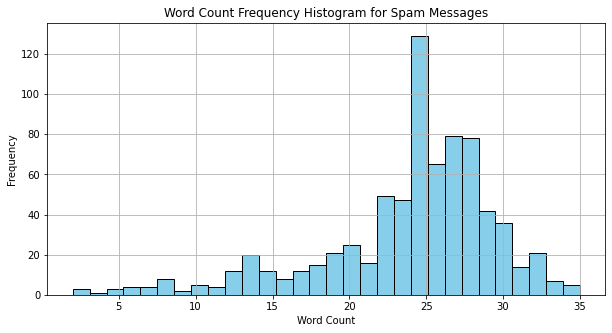

In [15]:
spamdf_subset = spam_df[spam_df['label_enc'] == 1]
hamdf_subset = spam_df[spam_df['label_enc'] == 0]
# Set the size of the plot
plt.figure(figsize=(10, 5))

# Create a Counter object to count the frequency of each word count
word_count_freq = Counter(spamdf_subset['Word_Counts'])

# Convert the Counter object to a DataFrame for easy plotting
word_count_df = pd.DataFrame.from_dict(word_count_freq, orient='index').reset_index()
word_count_df.columns = ['Word_Count', 'Frequency']

# Plot the histogram
plt.hist(spamdf_subset['Word_Counts'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Frequency Histogram for Spam Messages')
plt.grid(True)
plt.show()

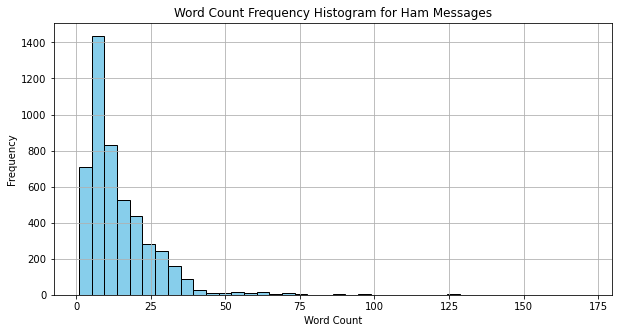

In [16]:
# Set the size of the plot
plt.figure(figsize=(10, 5))

# Create a Counter object to count the frequency of each word count
word_count_freq = Counter(hamdf_subset['Word_Counts'])

# Convert the Counter object to a DataFrame for easy plotting
word_count_df = pd.DataFrame.from_dict(word_count_freq, orient='index').reset_index()
word_count_df.columns = ['Word_Count', 'Frequency']

# Plot the histogram
plt.hist(hamdf_subset['Word_Counts'], bins=40, color='skyblue', edgecolor='black')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Frequency Histogram for Ham Messages')
plt.grid(True)
plt.show()

Text(0.5, 0, 'Message Length')

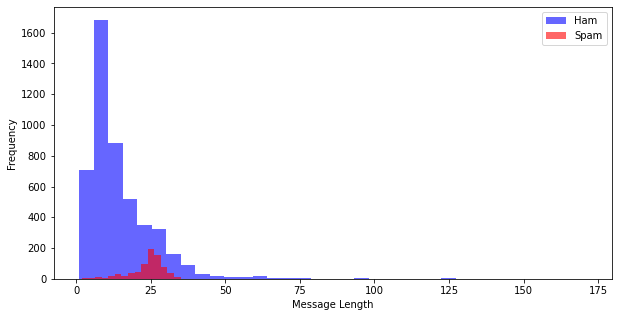

In [17]:
plt.figure(figsize=(10, 5))
spam_df[spam_df.label_enc == 0].Word_Counts.plot(bins=35,kind='hist', color='blue', label='Ham', alpha=0.6)
spam_df[spam_df.label_enc == 1].Word_Counts.plot(bins=15,kind='hist', color='red', label='Spam', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

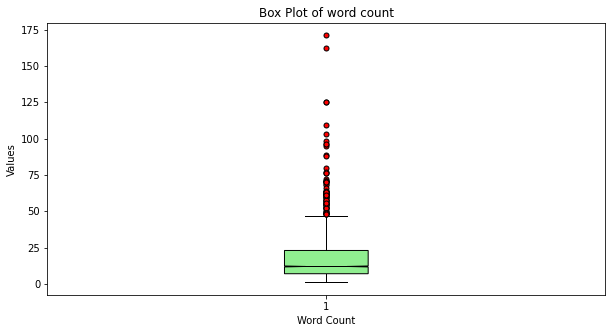

In [18]:
# Set the size of the plot
plt.figure(figsize=(10, 5))

plt.boxplot(spam_df['Word_Counts'], notch=True, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='black'), 
            whiskerprops=dict(color='black'), capprops=dict(color='black'),
            flierprops=dict(marker='o', markerfacecolor='red', markersize=5),
            medianprops=dict(color='black'))
plt.xlabel('Word Count')
plt.ylabel('Values')
plt.title('Box Plot of word count')
plt.show()

In [19]:
import numpy as np

# Calculate quartiles
Q1 = np.percentile(spam_df['Word_Counts'], 25)
Q3 = np.percentile(spam_df['Word_Counts'], 75)

# Calculate interquartile range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = spam_df[(spam_df['Word_Counts'] < lower_bound) | (spam_df['Word_Counts'] > upper_bound)]
num_outliers = outliers.shape[0]

print("Number of outliers:", num_outliers)

Number of outliers: 71


In [20]:
spam_df['Word_Counts'].describe()

count    5572.000000
mean       15.494436
std        11.329427
min         1.000000
25%         7.000000
50%        12.000000
75%        23.000000
max       171.000000
Name: Word_Counts, dtype: float64

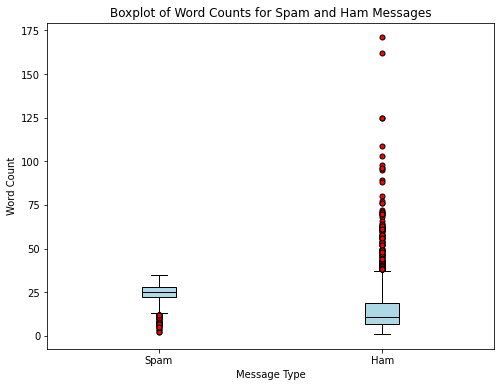

In [21]:
spam_word_counts = spam_df.loc[spam_df['label_enc'] == 1, 'Word_Counts']
ham_word_counts = spam_df.loc[spam_df['label_enc'] == 0, 'Word_Counts']
# Create a box plot for spam and ham word counts
plt.figure(figsize=(8, 6))
plt.boxplot([spam_word_counts,ham_word_counts], labels=['Spam', 'Ham'], patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'),medianprops=dict(color='black'),
            showfliers=True, whis=1.5, flierprops=dict(marker='o', markerfacecolor='red', markersize=5))

# Add labels and title
plt.xlabel('Message Type')
plt.ylabel('Word Count')
plt.title('Boxplot of Word Counts for Spam and Ham Messages')

# Customize colors
colors = ['lightblue', 'lightgreen']
for patch, color in zip(plt.gca().artists, colors):
    patch.set_facecolor(color)

# Show plot
plt.show()

In [22]:
# Calculate quartiles
Q1 = np.percentile(spamdf_subset['Word_Counts'], 25)
Q3 = np.percentile(spamdf_subset['Word_Counts'], 75)

# Calculate interquartile range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = spamdf_subset[(spamdf_subset['Word_Counts'] < lower_bound) | (spamdf_subset['Word_Counts'] > upper_bound)]
num_outliers = outliers.shape[0]

print("Number of Spam outliers:", num_outliers)
# Remove outliers from spam emails
spamdf_subset_clean = spamdf_subset[(spamdf_subset['Word_Counts'] >= lower_bound) & (spamdf_subset['Word_Counts'] <=upper_bound)]

Number of Spam outliers: 46


In [23]:
# Calculate quartiles
Q1 = np.percentile(hamdf_subset['Word_Counts'], 25)
Q3 = np.percentile(hamdf_subset['Word_Counts'], 75)

# Calculate interquartile range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = hamdf_subset[(hamdf_subset['Word_Counts'] <lower_bound) | (hamdf_subset['Word_Counts'] > upper_bound)]
num_outliers = outliers.shape[0]

print("Number of Ham outliers:", num_outliers)
# Remove outliers from ham emails
hamdf_subset_clean = hamdf_subset[(hamdf_subset['Word_Counts'] >= lower_bound) & (hamdf_subset['Word_Counts'] <= upper_bound)]

Number of Ham outliers: 132


In [24]:
spamdf_subset['Word_Counts'].describe()

count    747.000000
mean      23.851406
std        5.811898
min        2.000000
25%       22.000000
50%       25.000000
75%       28.000000
max       35.000000
Name: Word_Counts, dtype: float64

In [25]:
hamdf_subset['Word_Counts'].describe()

count    4825.000000
mean       14.200622
std        11.424511
min         1.000000
25%         7.000000
50%        11.000000
75%        19.000000
max       171.000000
Name: Word_Counts, dtype: float64

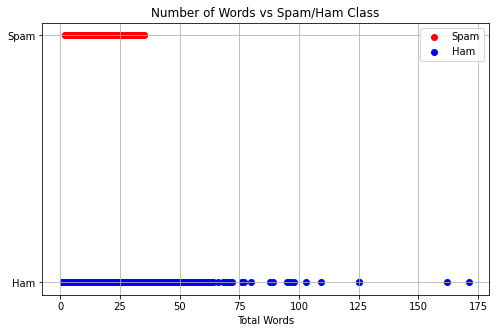

In [26]:
# Separate data for spam and ham classes
spam_data = spam_df[spam_df['label'] == 'spam']
ham_data = spam_df[spam_df['label'] == 'ham']

# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(spam_data['Word_Counts'], [1] * len(spam_data), color='red', label='Spam')
plt.scatter(ham_data['Word_Counts'], [0] * len(ham_data), color='blue', label='Ham')
plt.yticks([0, 1], ['Ham', 'Spam'])
plt.xlabel('Total Words')
plt.title('Number of Words vs Spam/Ham Class')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Concatenate the cleaned subsets back into the original DataFrame
cleaned_spam_df = pd.concat([spamdf_subset_clean, hamdf_subset_clean])
# Shuffle the DataFrame
cleaned_spam_df_shuffled = cleaned_spam_df.sample(frac=1).reset_index(drop=True)
# Check the shape of the shuffled DataFrame
print("Shape of shuffled DataFrame:", cleaned_spam_df_shuffled.shape)

Shape of shuffled DataFrame: (5394, 4)


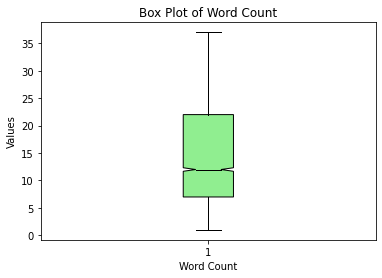

In [28]:
#Box plot without outliers
plt.boxplot(cleaned_spam_df_shuffled['Word_Counts'], notch=True, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='black'), 
            whiskerprops=dict(color='black'), capprops=dict(color='black'), medianprops=dict(color='black'))
plt.xlabel('Word Count')
plt.ylabel('Values')
plt.title('Box Plot of Word Count')
plt.show()

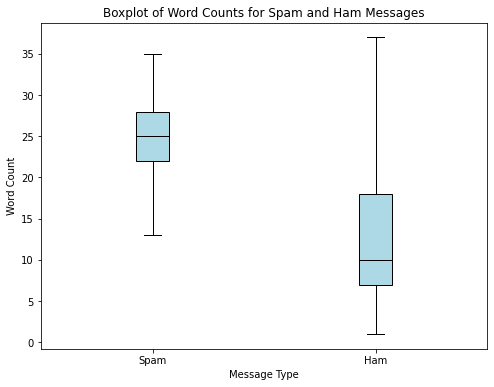

In [29]:
spam_word_counts = cleaned_spam_df_shuffled.loc[cleaned_spam_df_shuffled['label_enc'] == 1, 'Word_Counts']
ham_word_counts = cleaned_spam_df_shuffled.loc[cleaned_spam_df_shuffled['label_enc'] == 0, 'Word_Counts']
# Create a box plot for spam and ham word counts
plt.figure(figsize=(8, 6))
plt.boxplot([spam_word_counts,ham_word_counts], labels=['Spam', 'Ham'], patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'),medianprops=dict(color='black'),
            showfliers=True, whis=1.75, flierprops=dict(marker='o', markerfacecolor='red', markersize=5))

# Add labels and title
plt.xlabel('Message Type')
plt.ylabel('Word Count')
plt.title('Boxplot of Word Counts for Spam and Ham Messages')

# Customize colors
colors = ['lightblue', 'lightgreen']
for patch, color in zip(plt.gca().artists, colors):
    patch.set_facecolor(color)

# Show plot
plt.show()

In [30]:
# Finding Total no of unique words in corpus without outliers
s = set()
for sent in cleaned_spam_df_shuffled['Text']:
    for word in sent.split():
        s.add(word)
total_words_length=len(s)
print("The total number of unique words is:",total_words_length)

The total number of unique words is: 14644


In [31]:
cleaned_spam_df_shuffled['Word_Counts'].describe()

count    5394.000000
mean       14.558584
std         8.859850
min         1.000000
25%         7.000000
50%        12.000000
75%        22.000000
max        37.000000
Name: Word_Counts, dtype: float64

In [32]:
spamdf_subset_clean['Word_Counts'].describe()

count    701.000000
mean      24.848787
std        4.388943
min       13.000000
25%       22.000000
50%       25.000000
75%       28.000000
max       35.000000
Name: Word_Counts, dtype: float64

In [33]:
hamdf_subset_clean['Word_Counts'].describe()

count    4693.000000
mean       13.021521
std         8.316712
min         1.000000
25%         7.000000
50%        10.000000
75%        18.000000
max        37.000000
Name: Word_Counts, dtype: float64

In [34]:
#80:20 Overall Split after removal of outliers 

# Splitting data for Training and testing
from sklearn.model_selection import train_test_split
 
X, y = np.asanyarray(cleaned_spam_df_shuffled['Text']), np.asanyarray(cleaned_spam_df_shuffled['label_enc'])
new_df = pd.DataFrame({'Text': X, 'label': y})
X_train, X_test, y_train, y_test = train_test_split(
    new_df['Text'], new_df['label'], test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((4315,), (4315,), (1079,), (1079,))

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score
 
tfidf_vec = TfidfVectorizer(min_df=1).fit(X_train)
X_train_vec,X_test_vec = tfidf_vec.transform(X_train),tfidf_vec.transform(X_test)

In [36]:
#Applying SMOTE on the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_sm,y_train_sm = smote.fit_resample(X_train_vec,y_train)

In [37]:
#Naive Bayes Classifier with SMOTE 
baseline_model_1_sm = MultinomialNB()
baseline_model_1_sm.fit(X_train_sm,y_train_sm)

MultinomialNB()

In [38]:
#Naive Bayes Classifier without SMOTE 
baseline_model = MultinomialNB()
baseline_model.fit(X_train_vec,y_train)

MultinomialNB()

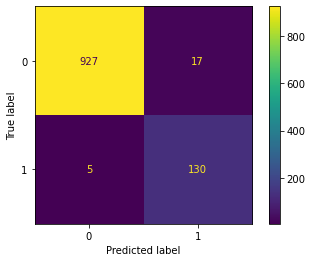

In [39]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(baseline_model_1_sm,X_test_vec,y_test)

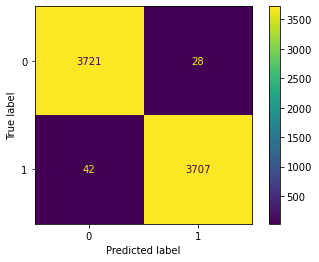

In [40]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(baseline_model_1_sm,X_train_sm,y_train_sm)

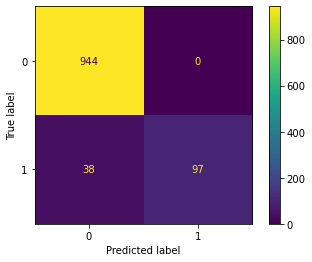

In [41]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(baseline_model,X_test_vec,y_test)

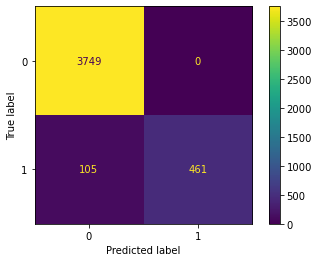

In [51]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(baseline_model,X_train_vec,y_train)

In [43]:
#Logistic Regression with SMOTE
from sklearn.linear_model import LogisticRegression
# Initialize the logistic regression model
baseline_model_2_sm = LogisticRegression()
# Fit the model to the training data
baseline_model_2_sm.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [44]:
#Logistic Regression without SMOTE
# Initialize the logistic regression model
baseline_model_2 = LogisticRegression()

# Fit the model to the training data
baseline_model_2.fit(X_train_vec, y_train)

LogisticRegression()

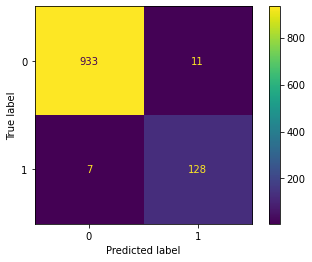

In [47]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(baseline_model_2_sm,X_test_vec,y_test)

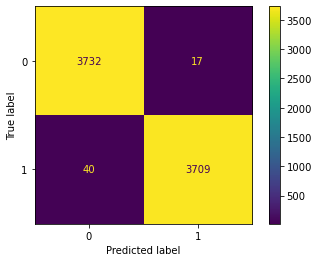

In [48]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(baseline_model_2_sm,X_train_sm,y_train_sm)

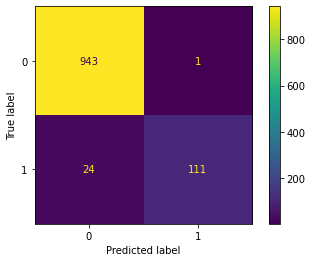

In [49]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(baseline_model_2,X_test_vec,y_test)

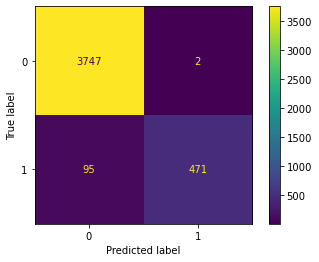

In [50]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(baseline_model_2,X_train_vec,y_train)

In [194]:
#Random Forest without SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(RandomForestClassifier(), {
    'n_estimators': [20,25,30,35,40]
    }, cv=5, return_train_score=False)
clf.fit(X_train_vec, y_train)
clf.cv_results_

{'mean_fit_time': array([1.13351698, 1.41924095, 1.70101495, 1.96749768, 2.30239501]),
 'std_fit_time': array([0.0234458 , 0.03648325, 0.02446654, 0.02903537, 0.06416254]),
 'mean_score_time': array([0.01706042, 0.02306309, 0.02694154, 0.02201509, 0.03238955]),
 'std_score_time': array([0.0025432 , 0.00687118, 0.00612082, 0.00782036, 0.00194889]),
 'param_n_estimators': masked_array(data=[20, 25, 30, 35, 40],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 20},
  {'n_estimators': 25},
  {'n_estimators': 30},
  {'n_estimators': 35},
  {'n_estimators': 40}],
 'split0_test_score': array([0.97566628, 0.97566628, 0.97566628, 0.97450753, 0.97566628]),
 'split1_test_score': array([0.98377752, 0.98377752, 0.98377752, 0.98493627, 0.98725377]),
 'split2_test_score': array([0.97334878, 0.97219003, 0.97914253, 0.97798378, 0.97450753]),
 'split3_test_score': array([0.97798378, 0.98030127, 0.97450753, 0.97682503

In [195]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.133517,0.023446,0.017060,0.002543,20,{'n_estimators': 20},0.975666,0.983778,0.973349,0.977984,0.964079,0.974971,0.006456,5
1,1.419241,0.036483,0.023063,0.006871,25,{'n_estimators': 25},0.975666,0.983778,0.972190,0.980301,0.968714,0.976130,0.005415,3
2,1.701015,0.024467,0.026942,0.006121,30,{'n_estimators': 30},0.975666,0.983778,0.979143,0.974508,0.972190,0.977057,0.004041,2
3,1.967498,0.029035,0.022015,0.007820,35,{'n_estimators': 35},0.974508,0.984936,0.977984,0.976825,0.965238,0.975898,0.006364,4
4,2.302395,0.064163,0.032390,0.001949,40,{'n_estimators': 40},0.975666,0.987254,0.974508,0.976825,0.974508,0.977752,0.004828,1


In [196]:
df[['param_n_estimators','mean_test_score']]

,param_n_estimators,mean_test_score
0,20,0.974971
1,25,0.976130
2,30,0.977057
3,35,0.975898
4,40,0.977752


In [197]:
clf.best_params_

{'n_estimators': 40}

In [53]:
#Random Forest without SMOTE
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=40, random_state=42)  # You can adjust the number of trees (n_estimators)

# Train the Random Forest classifier
rf_classifier.fit(X_train_vec, y_train)

RandomForestClassifier(n_estimators=40, random_state=42)

In [199]:
#Random Forest with SMOTE
clf_sm = GridSearchCV(RandomForestClassifier(), {
    'n_estimators': [20,25,30,35,40]
    }, cv=5, return_train_score=False)
clf_sm.fit(X_train_sm, y_train_sm)
clf_sm.cv_results_

{'mean_fit_time': array([1.22295556, 1.57159462, 1.85247579, 2.13170271, 2.44495502]),
 'std_fit_time': array([0.07957794, 0.1532539 , 0.14596549, 0.17406055, 0.18006399]),
 'mean_score_time': array([0.02247453, 0.02511625, 0.03310513, 0.03439994, 0.04072967]),
 'std_score_time': array([0.00735292, 0.00774693, 0.00363109, 0.00624661, 0.00753879]),
 'param_n_estimators': masked_array(data=[20, 25, 30, 35, 40],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 20},
  {'n_estimators': 25},
  {'n_estimators': 30},
  {'n_estimators': 35},
  {'n_estimators': 40}],
 'split0_test_score': array([0.97074468, 0.97473404, 0.96941489, 0.97140957, 0.96675532]),
 'split1_test_score': array([1.        , 1.        , 1.        , 0.99933466, 1.        ]),
 'split2_test_score': array([0.99933466, 0.99800399, 1.        , 0.99933466, 0.99933466]),
 'split3_test_score': array([0.99933466, 0.99933466, 0.99933466, 1.        

In [200]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.133517,0.023446,0.017060,0.002543,20,{'n_estimators': 20},0.975666,0.983778,0.973349,0.977984,0.964079,0.974971,0.006456,5
1,1.419241,0.036483,0.023063,0.006871,25,{'n_estimators': 25},0.975666,0.983778,0.972190,0.980301,0.968714,0.976130,0.005415,3
2,1.701015,0.024467,0.026942,0.006121,30,{'n_estimators': 30},0.975666,0.983778,0.979143,0.974508,0.972190,0.977057,0.004041,2
3,1.967498,0.029035,0.022015,0.007820,35,{'n_estimators': 35},0.974508,0.984936,0.977984,0.976825,0.965238,0.975898,0.006364,4
4,2.302395,0.064163,0.032390,0.001949,40,{'n_estimators': 40},0.975666,0.987254,0.974508,0.976825,0.974508,0.977752,0.004828,1


In [201]:
df[['param_n_estimators','mean_test_score']]

,param_n_estimators,mean_test_score
0,20,0.974971
1,25,0.976130
2,30,0.977057
3,35,0.975898
4,40,0.977752


In [202]:
clf.best_params_

{'n_estimators': 40}

In [54]:
# Create a Random Forest classifier
rf_classifier_sm = RandomForestClassifier(n_estimators=40, random_state=42)  # You can adjust the number of trees (n_estimators)

# Train the Random Forest classifier
rf_classifier_sm.fit(X_train_sm, y_train_sm)

RandomForestClassifier(n_estimators=40, random_state=42)

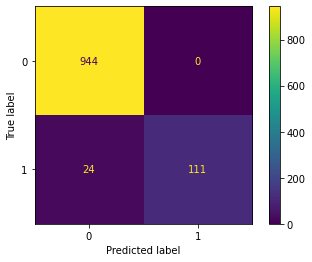

In [57]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_classifier_sm,X_test_vec,y_test)

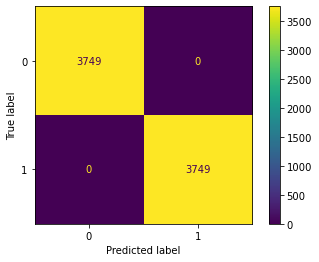

In [58]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_classifier_sm,X_train_sm,y_train_sm)

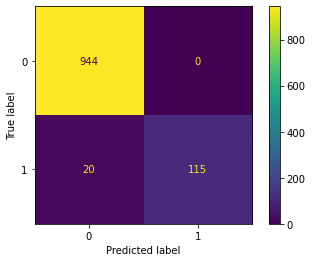

In [59]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_classifier,X_test_vec,y_test)

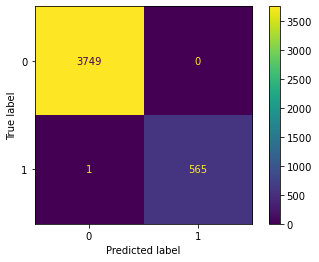

In [60]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_classifier,X_train_vec,y_train)

In [55]:
#Bagging without SMOTE
rf_classifier_bag = RandomForestClassifier(n_estimators=40, random_state=42,max_features=None)  # You can adjust the number of trees (n_estimators)
rf_classifier_bag.fit(X_train_vec, y_train)

RandomForestClassifier(max_features=None, n_estimators=40, random_state=42)

In [56]:
#Bagging with SMOTE
rf_classifier_bag_sm = RandomForestClassifier(n_estimators=40, random_state=42,max_features=None)  # You can adjust the number of trees (n_estimators)
rf_classifier_bag_sm.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_features=None, n_estimators=40, random_state=42)

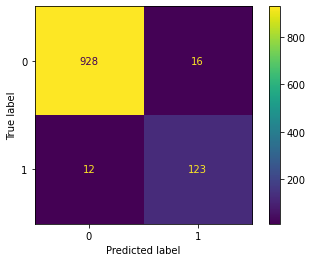

In [61]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_classifier_bag_sm,X_test_vec,y_test)

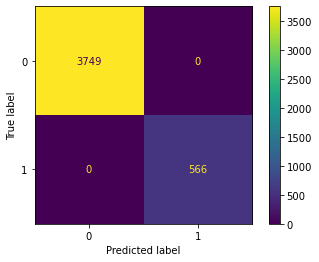

In [62]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_classifier_bag_sm,X_train_vec,y_train)

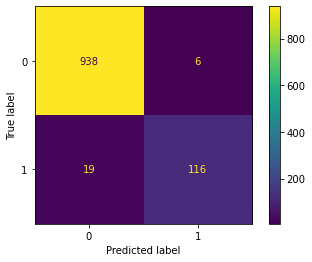

In [63]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_classifier_bag,X_test_vec,y_test)

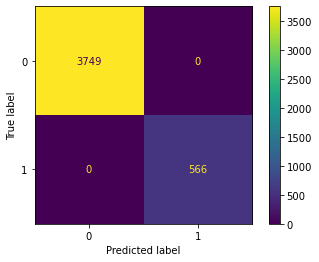

In [64]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_classifier_bag,X_train_vec,y_train)

In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score
  
def evaluate_model(model, X, y):
    '''
    evaluate the model and returns accuracy,
    precision, recall and f1-score
    '''
    y_preds = np.round(model.predict(X))
    accuracy = accuracy_score(y, y_preds)
    precision = precision_score(y, y_preds)
    recall = recall_score(y, y_preds)
    f1 = f1_score(y, y_preds)
 
    model_results_dict = {'accuracy': accuracy,
                          'precision': precision,
                          'recall': recall,
                          'f1-score': f1}
 
    return model_results_dict

In [66]:
#Model Performance with SMOTE
#Test Data Performance
baseline_model_results = evaluate_model(baseline_model_1_sm, X_test_vec, y_test)
baseline_model2_results= evaluate_model(baseline_model_2_sm, X_test_vec, y_test)
baseline_model3_results= evaluate_model(rf_classifier_sm, X_test_vec, y_test)
bagging_results= evaluate_model(rf_classifier_bag_sm, X_test_vec, y_test)

total_results = pd.DataFrame({'Naive Bayes classifier':baseline_model_results,
                              'Logistic Regression ':baseline_model2_results,
                             'Random Forest':baseline_model3_results,
                             'Bagging': bagging_results}).transpose()
 
total_results

,accuracy,precision,recall,f1-score
Naive Bayes classifier,0.979611,0.884354,0.962963,0.921986
Logistic Regression,0.983318,0.920863,0.948148,0.934307
Random Forest,0.977757,1.000000,0.822222,0.902439
Bagging,0.974050,0.884892,0.911111,0.897810


In [208]:
total_results.sort_values('f1-score', ascending=False)

,accuracy,precision,recall,f1-score
Logistic Regression,0.983318,0.956522,0.916667,0.936170
Random Forest,0.979611,1.000000,0.847222,0.917293
Naive Bayes classifier,0.975904,0.893333,0.930556,0.911565
Bagging,0.970343,0.911765,0.861111,0.885714


In [209]:
#Train Data Performance
baseline_model_results = evaluate_model(baseline_model_1_sm, X_train_sm, y_train_sm)
baseline_model2_results= evaluate_model(baseline_model_2_sm, X_train_sm, y_train_sm)
baseline_model3_results= evaluate_model(rf_classifier_sm, X_train_sm, y_train_sm)
bagging_results= evaluate_model(rf_classifier_bag_sm, X_train_sm, y_train_sm)

total_results = pd.DataFrame({'Naive Bayes classifier':baseline_model_results,
                              'Logistic Regression ':baseline_model2_results,
                             'Random Forest':baseline_model3_results,
                             'Bagging': bagging_results}).transpose()
 
total_results

,accuracy,precision,recall,f1-score
Naive Bayes classifier,0.992283,0.992545,0.992017,0.992281
Logistic Regression,0.994146,0.995200,0.993081,0.994140
Random Forest,1.000000,1.000000,1.000000,1.000000
Bagging,0.999734,1.000000,0.999468,0.999734


In [210]:
total_results.sort_values('f1-score', ascending=False)

,accuracy,precision,recall,f1-score
Random Forest,1.000000,1.000000,1.000000,1.000000
Bagging,0.999734,1.000000,0.999468,0.999734
Logistic Regression,0.994146,0.995200,0.993081,0.994140
Naive Bayes classifier,0.992283,0.992545,0.992017,0.992281


In [211]:
#Model Performance without SMOTE
#Test Data Performance
baseline_model_results = evaluate_model(baseline_model, X_test_vec, y_test)
baseline_model2_results= evaluate_model(baseline_model_2, X_test_vec, y_test)
baseline_model3_results= evaluate_model(rf_classifier, X_test_vec, y_test)
bagging_results= evaluate_model(rf_classifier_bag, X_test_vec, y_test)

total_results = pd.DataFrame({'Naive Bayes classifier':baseline_model_results,
                              'Logistic Regression ':baseline_model2_results,
                             'Random Forest':baseline_model3_results,
                             'Bagging':bagging_results}).transpose()
 
total_results

,accuracy,precision,recall,f1-score
Naive Bayes classifier,0.962002,1.000000,0.715278,0.834008
Logistic Regression,0.973123,0.991453,0.805556,0.888889
Random Forest,0.975904,0.991667,0.826389,0.901515
Bagging,0.974977,0.953488,0.854167,0.901099


In [212]:
total_results.sort_values('f1-score', ascending=False)

,accuracy,precision,recall,f1-score
Random Forest,0.975904,0.991667,0.826389,0.901515
Bagging,0.974977,0.953488,0.854167,0.901099
Logistic Regression,0.973123,0.991453,0.805556,0.888889
Naive Bayes classifier,0.962002,1.000000,0.715278,0.834008


In [213]:
#Train Data Performance
baseline_model_results = evaluate_model(baseline_model, X_train_vec, y_train)
baseline_model2_results= evaluate_model(baseline_model_2, X_train_vec, y_train)
baseline_model3_results= evaluate_model(rf_classifier, X_train_vec, y_train)
bagging_results= evaluate_model(rf_classifier_bag, X_train_vec, y_train)

total_results = pd.DataFrame({'Naive Bayes classifier':baseline_model_results,
                              'Logistic Regression ':baseline_model2_results,
                             'Random Forest':baseline_model3_results,
                             'Bagging':bagging_results}).transpose()
 
total_results

,accuracy,precision,recall,f1-score
Naive Bayes classifier,0.975435,1.000000,0.809695,0.894841
Logistic Regression,0.978447,0.995726,0.836625,0.909268
Random Forest,0.999768,1.000000,0.998205,0.999102
Bagging,0.999305,1.000000,0.994614,0.997300


In [214]:
total_results.sort_values('f1-score', ascending=False)

,accuracy,precision,recall,f1-score
Random Forest,0.999768,1.000000,0.998205,0.999102
Bagging,0.999305,1.000000,0.994614,0.997300
Logistic Regression,0.978447,0.995726,0.836625,0.909268
Naive Bayes classifier,0.975435,1.000000,0.809695,0.894841


In [215]:
#80:20 Split from both Spam and Ham after removal of outliers
# Separate spam and ham messages
spam_messages = new_df[new_df['label'] == 1]
ham_messages = new_df[new_df['label'] == 0]

# Split spam messages into train and test sets
X_train_spam, X_test_spam, y_train_spam, y_test_spam = train_test_split(
    spam_messages['Text'], spam_messages['label'], test_size=0.2, random_state=42)

# Split ham messages into train and test sets
X_train_ham, X_test_ham, y_train_ham, y_test_ham = train_test_split(
    ham_messages['Text'], ham_messages['label'], test_size=0.2, random_state=42)

# Concatenate train and test sets for spam and ham
X_train = pd.concat([X_train_spam, X_train_ham])
X_test = pd.concat([X_test_spam, X_test_ham])
y_train = pd.concat([y_train_spam, y_train_ham])
y_test = pd.concat([y_test_spam, y_test_ham])

# Shuffle the data
X_train = X_train.sample(frac=1, random_state=42).reset_index(drop=True)
X_test = X_test.sample(frac=1, random_state=42).reset_index(drop=True)
y_train = y_train.sample(frac=1, random_state=42).reset_index(drop=True)
y_test = y_test.sample(frac=1, random_state=42).reset_index(drop=True)

# Check shapes
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4314,), (4314,), (1080,), (1080,))

In [216]:
#Applying TF-IDF Vectorizer
tfidf_vec = TfidfVectorizer(min_df=1).fit(X_train)
X_train_vec,X_test_vec = tfidf_vec.transform(X_train),tfidf_vec.transform(X_test)

In [217]:
#Applying SMOTE on the training data
smote = SMOTE()
X_train_sm,y_train_sm = smote.fit_resample(X_train_vec,y_train)

In [218]:
#Naive Bayes Classifier with SMOTE 
baseline_model_1_sm = MultinomialNB()
baseline_model_1_sm.fit(X_train_sm,y_train_sm)

MultinomialNB()

In [219]:
#Naive Bayes Classifier without SMOTE 
baseline_model = MultinomialNB()
baseline_model.fit(X_train_vec,y_train)

MultinomialNB()

In [220]:
#Logistic Regression with SMOTE
from sklearn.linear_model import LogisticRegression
# Initialize the logistic regression model
baseline_model_2_sm = LogisticRegression()
# Fit the model to the training data
baseline_model_2_sm.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [221]:
#Logistic Regression without SMOTE
# Initialize the logistic regression model
baseline_model_2 = LogisticRegression()

# Fit the model to the training data
baseline_model_2.fit(X_train_vec, y_train)

LogisticRegression()

In [222]:
#Random Forest without SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(RandomForestClassifier(), {
    'n_estimators': [20,25,30,35,40]
    }, cv=5, return_train_score=False)
clf.fit(X_train_vec, y_train)
clf.cv_results_

{'mean_fit_time': array([1.16273808, 1.44611292, 1.73383021, 2.04911075, 2.35685353]),
 'std_fit_time': array([0.11164573, 0.02244753, 0.03194658, 0.012147  , 0.02973568]),
 'mean_score_time': array([0.01563001, 0.01889029, 0.01887259, 0.02822084, 0.03148041]),
 'std_score_time': array([1.64090191e-05, 6.18928033e-03, 6.19536713e-03, 6.25179230e-03,
        2.67157890e-04]),
 'param_n_estimators': masked_array(data=[20, 25, 30, 35, 40],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 20},
  {'n_estimators': 25},
  {'n_estimators': 30},
  {'n_estimators': 35},
  {'n_estimators': 40}],
 'split0_test_score': array([0.97566628, 0.98030127, 0.97798378, 0.98377752, 0.97914253]),
 'split1_test_score': array([0.97566628, 0.97682503, 0.97914253, 0.98146002, 0.97219003]),
 'split2_test_score': array([0.97798378, 0.97682503, 0.97798378, 0.97566628, 0.98030127]),
 'split3_test_score': array([0.97103129, 0.9791

In [223]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.162738,0.111646,0.015630,0.000016,20,{'n_estimators': 20},0.975666,0.975666,0.977984,0.971031,0.969838,0.974037,0.003084,5
1,1.446113,0.022448,0.018890,0.006189,25,{'n_estimators': 25},0.980301,0.976825,0.976825,0.979143,0.975638,0.977746,0.001710,2
2,1.733830,0.031947,0.018873,0.006195,30,{'n_estimators': 30},0.977984,0.979143,0.977984,0.977984,0.975638,0.977746,0.001146,3
3,2.049111,0.012147,0.028221,0.006252,35,{'n_estimators': 35},0.983778,0.981460,0.975666,0.979143,0.979118,0.979833,0.002704,1
4,2.356854,0.029736,0.031480,0.000267,40,{'n_estimators': 40},0.979143,0.972190,0.980301,0.975666,0.979118,0.977284,0.002983,4


In [224]:
df[['param_n_estimators','mean_test_score']]

,param_n_estimators,mean_test_score
0,20,0.974037
1,25,0.977746
2,30,0.977746
3,35,0.979833
4,40,0.977284


In [225]:
clf.best_params_

{'n_estimators': 35}

In [226]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'], random_state=42)  # You can adjust the number of trees (n_estimators)

# Train the Random Forest classifier
rf_classifier.fit(X_train_vec, y_train)

RandomForestClassifier(n_estimators=35, random_state=42)

In [227]:
#Random Forest with SMOTE
clf_sm = GridSearchCV(RandomForestClassifier(), {
    'n_estimators': [20,25,30,35,40]
    }, cv=5, return_train_score=False)
clf_sm.fit(X_train_sm, y_train_sm)
clf_sm.cv_results_

{'mean_fit_time': array([1.25840979, 1.57943721, 1.87450695, 2.18948474, 2.49435878]),
 'std_fit_time': array([0.08803891, 0.12979911, 0.11909641, 0.18777066, 0.19168799]),
 'mean_score_time': array([0.01844578, 0.02614164, 0.0312552 , 0.03216295, 0.03904915]),
 'std_score_time': array([6.41750616e-03, 6.72646784e-03, 4.58784257e-05, 1.87621962e-03,
        7.48369760e-03]),
 'param_n_estimators': masked_array(data=[20, 25, 30, 35, 40],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 20},
  {'n_estimators': 25},
  {'n_estimators': 30},
  {'n_estimators': 35},
  {'n_estimators': 40}],
 'split0_test_score': array([0.96404794, 0.96737683, 0.96271638, 0.96604527, 0.96537949]),
 'split1_test_score': array([1.        , 0.99933422, 1.        , 1.        , 1.        ]),
 'split2_test_score': array([0.99866844, 1.        , 1.        , 0.99866844, 0.99866844]),
 'split3_test_score': array([0.99933378, 1.    

In [228]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.162738,0.111646,0.015630,0.000016,20,{'n_estimators': 20},0.975666,0.975666,0.977984,0.971031,0.969838,0.974037,0.003084,5
1,1.446113,0.022448,0.018890,0.006189,25,{'n_estimators': 25},0.980301,0.976825,0.976825,0.979143,0.975638,0.977746,0.001710,2
2,1.733830,0.031947,0.018873,0.006195,30,{'n_estimators': 30},0.977984,0.979143,0.977984,0.977984,0.975638,0.977746,0.001146,3
3,2.049111,0.012147,0.028221,0.006252,35,{'n_estimators': 35},0.983778,0.981460,0.975666,0.979143,0.979118,0.979833,0.002704,1
4,2.356854,0.029736,0.031480,0.000267,40,{'n_estimators': 40},0.979143,0.972190,0.980301,0.975666,0.979118,0.977284,0.002983,4


In [229]:
df[['param_n_estimators','mean_test_score']]

,param_n_estimators,mean_test_score
0,20,0.974037
1,25,0.977746
2,30,0.977746
3,35,0.979833
4,40,0.977284


In [230]:
clf.best_params_

{'n_estimators': 35}

In [231]:
# Create a Random Forest classifier
rf_classifier_sm = RandomForestClassifier(n_estimators=clf_sm.best_params_['n_estimators'], random_state=42)  # You can adjust the number of trees (n_estimators)

# Train the Random Forest classifier
rf_classifier_sm.fit(X_train_sm, y_train_sm)

RandomForestClassifier(n_estimators=25, random_state=42)

In [232]:
#Bagging without SMOTE
rf_classifier_bag = RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'], random_state=42,max_features=None)  # You can adjust the number of trees (n_estimators)
rf_classifier_bag.fit(X_train_vec, y_train)

RandomForestClassifier(max_features=None, n_estimators=35, random_state=42)

In [233]:
#Bagging with SMOTE
rf_classifier_bag_sm = RandomForestClassifier(n_estimators=clf_sm.best_params_['n_estimators'], random_state=42,max_features=None)  # You can adjust the number of trees (n_estimators)
rf_classifier_bag_sm.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_features=None, n_estimators=25, random_state=42)

In [234]:
#Model Performance with SMOTE
#Test Data Performance
baseline_model_results = evaluate_model(baseline_model_1_sm, X_test_vec, y_test)
baseline_model2_results= evaluate_model(baseline_model_2_sm, X_test_vec, y_test)
baseline_model3_results= evaluate_model(rf_classifier_sm, X_test_vec, y_test)
bagging_results= evaluate_model(rf_classifier_bag_sm, X_test_vec, y_test)

total_results = pd.DataFrame({'Naive Bayes classifier':baseline_model_results,
                              'Logistic Regression ':baseline_model2_results,
                             'Random Forest':baseline_model3_results,
                             'Bagging': bagging_results}).transpose()
 
total_results

,accuracy,precision,recall,f1-score
Naive Bayes classifier,0.987963,0.944444,0.964539,0.954386
Logistic Regression,0.992593,0.985401,0.957447,0.971223
Random Forest,0.978704,1.000000,0.836879,0.911197
Bagging,0.969444,0.875000,0.893617,0.884211


In [235]:
total_results.sort_values('f1-score', ascending=False)

,accuracy,precision,recall,f1-score
Logistic Regression,0.992593,0.985401,0.957447,0.971223
Naive Bayes classifier,0.987963,0.944444,0.964539,0.954386
Random Forest,0.978704,1.000000,0.836879,0.911197
Bagging,0.969444,0.875000,0.893617,0.884211


In [236]:
#Train Data Performance
baseline_model_results = evaluate_model(baseline_model_1_sm, X_train_sm, y_train_sm)
baseline_model2_results= evaluate_model(baseline_model_2_sm, X_train_sm, y_train_sm)
baseline_model3_results= evaluate_model(rf_classifier_sm, X_train_sm, y_train_sm)
bagging_results= evaluate_model(rf_classifier_bag_sm, X_train_sm, y_train_sm)

total_results = pd.DataFrame({'Naive Bayes classifier':baseline_model_results,
                              'Logistic Regression ':baseline_model2_results,
                             'Random Forest':baseline_model3_results,
                             'Bagging': bagging_results}).transpose()
 
total_results

,accuracy,precision,recall,f1-score
Naive Bayes classifier,0.991609,0.991478,0.991742,0.991610
Logistic Regression,0.994406,0.995462,0.993340,0.994400
Random Forest,1.000000,1.000000,1.000000,1.000000
Bagging,0.999867,1.000000,0.999734,0.999867


In [237]:
total_results.sort_values('f1-score', ascending=False)

,accuracy,precision,recall,f1-score
Random Forest,1.000000,1.000000,1.000000,1.000000
Bagging,0.999867,1.000000,0.999734,0.999867
Logistic Regression,0.994406,0.995462,0.993340,0.994400
Naive Bayes classifier,0.991609,0.991478,0.991742,0.991610


In [238]:
#Model Performance without SMOTE
#Test Data Performance
baseline_model_results = evaluate_model(baseline_model, X_test_vec, y_test)
baseline_model2_results= evaluate_model(baseline_model_2, X_test_vec, y_test)
baseline_model3_results= evaluate_model(rf_classifier, X_test_vec, y_test)
bagging_results= evaluate_model(rf_classifier_bag, X_test_vec, y_test)

total_results = pd.DataFrame({'Naive Bayes classifier':baseline_model_results,
                              'Logistic Regression ':baseline_model2_results,
                             'Random Forest':baseline_model3_results,
                             'Bagging':bagging_results}).transpose()
 
total_results

,accuracy,precision,recall,f1-score
Naive Bayes classifier,0.963889,1.000000,0.723404,0.839506
Logistic Regression,0.980556,1.000000,0.851064,0.919540
Random Forest,0.976852,1.000000,0.822695,0.902724
Bagging,0.975000,0.945312,0.858156,0.899628


In [239]:
total_results.sort_values('f1-score', ascending=False)

,accuracy,precision,recall,f1-score
Logistic Regression,0.980556,1.000000,0.851064,0.919540
Random Forest,0.976852,1.000000,0.822695,0.902724
Bagging,0.975000,0.945312,0.858156,0.899628
Naive Bayes classifier,0.963889,1.000000,0.723404,0.839506


In [240]:
#Train Data Performance
baseline_model_results = evaluate_model(baseline_model, X_train_vec, y_train)
baseline_model2_results= evaluate_model(baseline_model_2, X_train_vec, y_train)
baseline_model3_results= evaluate_model(rf_classifier, X_train_vec, y_train)
bagging_results= evaluate_model(rf_classifier_bag, X_train_vec, y_train)

total_results = pd.DataFrame({'Naive Bayes classifier':baseline_model_results,
                              'Logistic Regression ':baseline_model2_results,
                             'Random Forest':baseline_model3_results,
                             'Bagging':bagging_results}).transpose()
 
total_results

,accuracy,precision,recall,f1-score
Naive Bayes classifier,0.975661,1.00000,0.812500,0.896552
Logistic Regression,0.976588,0.99568,0.823214,0.901271
Random Forest,0.999768,1.00000,0.998214,0.999106
Bagging,0.999536,1.00000,0.996429,0.998211


In [241]:
total_results.sort_values('f1-score', ascending=False)

,accuracy,precision,recall,f1-score
Random Forest,0.999768,1.00000,0.998214,0.999106
Bagging,0.999536,1.00000,0.996429,0.998211
Logistic Regression,0.976588,0.99568,0.823214,0.901271
Naive Bayes classifier,0.975661,1.00000,0.812500,0.896552


In [242]:
#80:20 Overall Split considering the outliers

# Splitting data for Training and testing
X, y = np.asanyarray(spam_df['Text']), np.asanyarray(spam_df['label_enc'])
new_df = pd.DataFrame({'Text': X, 'label': y})
X_train, X_test, y_train, y_test = train_test_split(
    new_df['Text'], new_df['label'], test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((4457,), (4457,), (1115,), (1115,))

In [243]:
#Applying TF-IDF Vectorizer
tfidf_vec = TfidfVectorizer(min_df=1).fit(X_train)
X_train_vec,X_test_vec = tfidf_vec.transform(X_train),tfidf_vec.transform(X_test)

In [244]:
#Applying SMOTE on the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_sm,y_train_sm = smote.fit_resample(X_train_vec,y_train)


In [245]:
#Naive Bayes Classifier with SMOTE 
baseline_model_1_sm = MultinomialNB()
baseline_model_1_sm.fit(X_train_sm,y_train_sm)

MultinomialNB()

In [246]:
#Naive Bayes Classifier without SMOTE 
baseline_model = MultinomialNB()
baseline_model.fit(X_train_vec,y_train)

MultinomialNB()

In [247]:
#Logistic Regression with SMOTE
from sklearn.linear_model import LogisticRegression
# Initialize the logistic regression model
baseline_model_2_sm = LogisticRegression()
# Fit the model to the training data
baseline_model_2_sm.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [248]:
#Logistic Regression without SMOTE
# Initialize the logistic regression model
baseline_model_2 = LogisticRegression()

# Fit the model to the training data
baseline_model_2.fit(X_train_vec, y_train)

LogisticRegression()

In [249]:
#Random Forest without SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(RandomForestClassifier(), {
    'n_estimators': [20,25,30,35,40]
    }, cv=5, return_train_score=False)
clf.fit(X_train_vec, y_train)
clf.cv_results_

{'mean_fit_time': array([1.3679553 , 1.72070632, 2.06866188, 2.40808682, 2.73402314]),
 'std_fit_time': array([0.04426074, 0.04273859, 0.03087508, 0.06997474, 0.06172101]),
 'mean_score_time': array([0.01564002, 0.01883278, 0.03124661, 0.02836227, 0.03207479]),
 'std_score_time': array([2.53545576e-05, 6.20807680e-03, 5.98348749e-05, 6.09111546e-03,
        2.96348220e-03]),
 'param_n_estimators': masked_array(data=[20, 25, 30, 35, 40],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 20},
  {'n_estimators': 25},
  {'n_estimators': 30},
  {'n_estimators': 35},
  {'n_estimators': 40}],
 'split0_test_score': array([0.9764574 , 0.9764574 , 0.97533632, 0.97982063, 0.97982063]),
 'split1_test_score': array([0.97421525, 0.97757848, 0.97757848, 0.97533632, 0.97309417]),
 'split2_test_score': array([0.97643098, 0.97867565, 0.97418631, 0.97306397, 0.97643098]),
 'split3_test_score': array([0.96857464, 0.9730

In [250]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.367955,0.044261,0.015640,0.000025,20,{'n_estimators': 20},0.976457,0.974215,0.976431,0.968575,0.968575,0.972851,0.003585,5
1,1.720706,0.042739,0.018833,0.006208,25,{'n_estimators': 25},0.976457,0.977578,0.978676,0.973064,0.970819,0.975319,0.002933,1
2,2.068662,0.030875,0.031247,0.000060,30,{'n_estimators': 30},0.975336,0.977578,0.974186,0.973064,0.973064,0.974646,0.001691,2
3,2.408087,0.069975,0.028362,0.006091,35,{'n_estimators': 35},0.979821,0.975336,0.973064,0.969697,0.974186,0.974421,0.003293,4
4,2.734023,0.061721,0.032075,0.002963,40,{'n_estimators': 40},0.979821,0.973094,0.976431,0.967452,0.975309,0.974421,0.004106,3


In [251]:
df[['param_n_estimators','mean_test_score']]

,param_n_estimators,mean_test_score
0,20,0.972851
1,25,0.975319
2,30,0.974646
3,35,0.974421
4,40,0.974421


In [252]:
clf.best_params_

{'n_estimators': 25}

In [253]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'], random_state=42)  # You can adjust the number of trees (n_estimators)

# Train the Random Forest classifier
rf_classifier.fit(X_train_vec, y_train)

RandomForestClassifier(n_estimators=25, random_state=42)

In [254]:
#Random Forest with SMOTE
clf_sm = GridSearchCV(RandomForestClassifier(), {
    'n_estimators': [20,25,30,35,40]
    }, cv=5, return_train_score=False)
clf_sm.fit(X_train_sm, y_train_sm)
clf_sm.cv_results_

{'mean_fit_time': array([1.44936514, 1.83574667, 2.16692753, 2.51079378, 2.89711466]),
 'std_fit_time': array([0.12076076, 0.19612307, 0.18327087, 0.24222567, 0.23248843]),
 'mean_score_time': array([0.02431059, 0.02620192, 0.0314672 , 0.03644347, 0.04404588]),
 'std_score_time': array([0.00717179, 0.00661897, 0.00028322, 0.00887766, 0.00692506]),
 'param_n_estimators': masked_array(data=[20, 25, 30, 35, 40],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 20},
  {'n_estimators': 25},
  {'n_estimators': 30},
  {'n_estimators': 35},
  {'n_estimators': 40}],
 'split0_test_score': array([0.95401554, 0.96955959, 0.96178756, 0.96437824, 0.96502591]),
 'split1_test_score': array([0.99935233, 0.99935233, 0.99935233, 0.99935233, 0.99935233]),
 'split2_test_score': array([1.        , 0.99935233, 1.        , 1.        , 1.        ]),
 'split3_test_score': array([0.99935233, 0.99935233, 0.99935233, 1.        

In [255]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.367955,0.044261,0.015640,0.000025,20,{'n_estimators': 20},0.976457,0.974215,0.976431,0.968575,0.968575,0.972851,0.003585,5
1,1.720706,0.042739,0.018833,0.006208,25,{'n_estimators': 25},0.976457,0.977578,0.978676,0.973064,0.970819,0.975319,0.002933,1
2,2.068662,0.030875,0.031247,0.000060,30,{'n_estimators': 30},0.975336,0.977578,0.974186,0.973064,0.973064,0.974646,0.001691,2
3,2.408087,0.069975,0.028362,0.006091,35,{'n_estimators': 35},0.979821,0.975336,0.973064,0.969697,0.974186,0.974421,0.003293,4
4,2.734023,0.061721,0.032075,0.002963,40,{'n_estimators': 40},0.979821,0.973094,0.976431,0.967452,0.975309,0.974421,0.004106,3


In [256]:
df[['param_n_estimators','mean_test_score']]

,param_n_estimators,mean_test_score
0,20,0.972851
1,25,0.975319
2,30,0.974646
3,35,0.974421
4,40,0.974421


In [257]:
clf.best_params_

{'n_estimators': 25}

In [258]:
# Create a Random Forest classifier
rf_classifier_sm = RandomForestClassifier(n_estimators=clf_sm.best_params_['n_estimators'], random_state=42)  # You can adjust the number of trees (n_estimators)

# Train the Random Forest classifier
rf_classifier_sm.fit(X_train_sm, y_train_sm)

RandomForestClassifier(n_estimators=25, random_state=42)

In [259]:
#Bagging without SMOTE
rf_classifier_bag = RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'], random_state=42,max_features=None)  # You can adjust the number of trees (n_estimators)
rf_classifier_bag.fit(X_train_vec, y_train)

RandomForestClassifier(max_features=None, n_estimators=25, random_state=42)

In [260]:
#Bagging with SMOTE
rf_classifier_bag_sm = RandomForestClassifier(n_estimators=clf_sm.best_params_['n_estimators'], random_state=42,max_features=None)  # You can adjust the number of trees (n_estimators)
rf_classifier_bag_sm.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_features=None, n_estimators=25, random_state=42)

In [261]:
#Model Performance with SMOTE
#Test Data Performance
baseline_model_results = evaluate_model(baseline_model_1_sm, X_test_vec, y_test)
baseline_model2_results= evaluate_model(baseline_model_2_sm, X_test_vec, y_test)
baseline_model3_results= evaluate_model(rf_classifier_sm, X_test_vec, y_test)
bagging_results= evaluate_model(rf_classifier_bag_sm, X_test_vec, y_test)

total_results = pd.DataFrame({'Naive Bayes classifier':baseline_model_results,
                              'Logistic Regression ':baseline_model2_results,
                             'Random Forest':baseline_model3_results,
                             'Bagging': bagging_results}).transpose()
 
total_results

,accuracy,precision,recall,f1-score
Naive Bayes classifier,0.972197,0.883871,0.913333,0.898361
Logistic Regression,0.977578,0.931034,0.900000,0.915254
Random Forest,0.980269,1.000000,0.853333,0.920863
Bagging,0.965919,0.888889,0.853333,0.870748


In [262]:
total_results.sort_values('f1-score', ascending=False)

,accuracy,precision,recall,f1-score
Random Forest,0.980269,1.000000,0.853333,0.920863
Logistic Regression,0.977578,0.931034,0.900000,0.915254
Naive Bayes classifier,0.972197,0.883871,0.913333,0.898361
Bagging,0.965919,0.888889,0.853333,0.870748


In [263]:
#Train Data Performance
baseline_model_results = evaluate_model(baseline_model_1_sm, X_train_sm, y_train_sm)
baseline_model2_results= evaluate_model(baseline_model_2_sm, X_train_sm, y_train_sm)
baseline_model3_results= evaluate_model(rf_classifier_sm, X_train_sm, y_train_sm)
bagging_results= evaluate_model(rf_classifier_bag_sm, X_train_sm, y_train_sm)

total_results = pd.DataFrame({'Naive Bayes classifier':baseline_model_results,
                              'Logistic Regression ':baseline_model2_results,
                             'Random Forest':baseline_model3_results,
                             'Bagging': bagging_results}).transpose()
 
total_results

,accuracy,precision,recall,f1-score
Naive Bayes classifier,0.992617,0.992234,0.993005,0.992619
Logistic Regression,0.994301,0.995070,0.993523,0.994296
Random Forest,0.999741,1.000000,0.999482,0.999741
Bagging,0.999870,0.999741,1.000000,0.999870


In [264]:
total_results.sort_values('f1-score', ascending=False)

,accuracy,precision,recall,f1-score
Bagging,0.999870,0.999741,1.000000,0.999870
Random Forest,0.999741,1.000000,0.999482,0.999741
Logistic Regression,0.994301,0.995070,0.993523,0.994296
Naive Bayes classifier,0.992617,0.992234,0.993005,0.992619


In [265]:
#Model Performance without SMOTE
#Test Data Performance
baseline_model_results = evaluate_model(baseline_model, X_test_vec, y_test)
baseline_model2_results= evaluate_model(baseline_model_2, X_test_vec, y_test)
baseline_model3_results= evaluate_model(rf_classifier, X_test_vec, y_test)
bagging_results= evaluate_model(rf_classifier_bag, X_test_vec, y_test)

total_results = pd.DataFrame({'Naive Bayes classifier':baseline_model_results,
                              'Logistic Regression ':baseline_model2_results,
                             'Random Forest':baseline_model3_results,
                             'Bagging':bagging_results}).transpose()
 
total_results

,accuracy,precision,recall,f1-score
Naive Bayes classifier,0.962332,1.000000,0.720000,0.837209
Logistic Regression,0.965919,0.991228,0.753333,0.856061
Random Forest,0.976682,0.984375,0.840000,0.906475
Bagging,0.969507,0.946154,0.820000,0.878571


In [266]:
total_results.sort_values('f1-score', ascending=False)

,accuracy,precision,recall,f1-score
Random Forest,0.976682,0.984375,0.840000,0.906475
Bagging,0.969507,0.946154,0.820000,0.878571
Logistic Regression,0.965919,0.991228,0.753333,0.856061
Naive Bayes classifier,0.962332,1.000000,0.720000,0.837209


In [267]:
#Train Data Performance
baseline_model_results = evaluate_model(baseline_model, X_train_vec, y_train)
baseline_model2_results= evaluate_model(baseline_model_2, X_train_vec, y_train)
baseline_model3_results= evaluate_model(rf_classifier, X_train_vec, y_train)
bagging_results= evaluate_model(rf_classifier_bag, X_train_vec, y_train)

total_results = pd.DataFrame({'Naive Bayes classifier':baseline_model_results,
                              'Logistic Regression ':baseline_model2_results,
                             'Random Forest':baseline_model3_results,
                             'Bagging':bagging_results}).transpose()
 
total_results

,accuracy,precision,recall,f1-score
Naive Bayes classifier,0.972852,1.000000,0.797320,0.887232
Logistic Regression,0.975320,0.995927,0.819095,0.898897
Random Forest,0.999776,1.000000,0.998325,0.999162
Bagging,0.999327,1.000000,0.994975,0.997481


In [268]:
total_results.sort_values('f1-score', ascending=False)

,accuracy,precision,recall,f1-score
Random Forest,0.999776,1.000000,0.998325,0.999162
Bagging,0.999327,1.000000,0.994975,0.997481
Logistic Regression,0.975320,0.995927,0.819095,0.898897
Naive Bayes classifier,0.972852,1.000000,0.797320,0.887232


In [269]:
#80:20 Separate Split on both Spam and Ham considering the outliers

# Splitting data for Training and testing
# Separate spam and ham messages
spam_messages = new_df[new_df['label'] == 1]
ham_messages = new_df[new_df['label'] == 0]

# Split spam messages into train and test sets
X_train_spam, X_test_spam, y_train_spam, y_test_spam = train_test_split(
    spam_messages['Text'], spam_messages['label'], test_size=0.2, random_state=42)

# Split ham messages into train and test sets
X_train_ham, X_test_ham, y_train_ham, y_test_ham = train_test_split(
    ham_messages['Text'], ham_messages['label'], test_size=0.2, random_state=42)

# Concatenate train and test sets for spam and ham
X_train = pd.concat([X_train_spam, X_train_ham])
X_test = pd.concat([X_test_spam, X_test_ham])
y_train = pd.concat([y_train_spam, y_train_ham])
y_test = pd.concat([y_test_spam, y_test_ham])

# Shuffle the data
X_train = X_train.sample(frac=1, random_state=42).reset_index(drop=True)
X_test = X_test.sample(frac=1, random_state=42).reset_index(drop=True)
y_train = y_train.sample(frac=1, random_state=42).reset_index(drop=True)
y_test = y_test.sample(frac=1, random_state=42).reset_index(drop=True)
# Check shapes
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((4457,), (4457,), (1115,), (1115,))

In [270]:
#Applying TF-IDF Vectorizer
tfidf_vec = TfidfVectorizer(min_df=1).fit(X_train)
X_train_vec,X_test_vec = tfidf_vec.transform(X_train),tfidf_vec.transform(X_test)

In [271]:
#Applying SMOTE on the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_sm,y_train_sm = smote.fit_resample(X_train_vec,y_train)

In [272]:
#Naive Bayes Classifier with SMOTE 
baseline_model_1_sm = MultinomialNB()
baseline_model_1_sm.fit(X_train_sm,y_train_sm)

MultinomialNB()

In [273]:
#Naive Bayes Classifier without SMOTE 
baseline_model = MultinomialNB()
baseline_model.fit(X_train_vec,y_train)

MultinomialNB()

In [274]:
#Logistic Regression with SMOTE
from sklearn.linear_model import LogisticRegression
# Initialize the logistic regression model
baseline_model_2_sm = LogisticRegression()
# Fit the model to the training data
baseline_model_2_sm.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [275]:
#Logistic Regression without SMOTE
# Initialize the logistic regression model
baseline_model_2 = LogisticRegression()

# Fit the model to the training data
baseline_model_2.fit(X_train_vec, y_train)

LogisticRegression()

In [276]:
#Random Forest without SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(RandomForestClassifier(), {
    'n_estimators': [20,25,30,35,40]
    }, cv=5, return_train_score=False)
clf.fit(X_train_vec, y_train)
clf.cv_results_

{'mean_fit_time': array([1.44501033, 1.76351423, 2.09707665, 2.40978508, 2.84379568]),
 'std_fit_time': array([0.04039193, 0.08735567, 0.0668877 , 0.07815774, 0.08556911]),
 'mean_score_time': array([0.0125041 , 0.01879363, 0.01975589, 0.03141098, 0.03120656]),
 'std_score_time': array([0.00625205, 0.00626859, 0.00495928, 0.00019931, 0.00081622]),
 'param_n_estimators': masked_array(data=[20, 25, 30, 35, 40],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 20},
  {'n_estimators': 25},
  {'n_estimators': 30},
  {'n_estimators': 35},
  {'n_estimators': 40}],
 'split0_test_score': array([0.96636771, 0.96748879, 0.97197309, 0.97421525, 0.97309417]),
 'split1_test_score': array([0.97309417, 0.96973094, 0.97309417, 0.97533632, 0.96973094]),
 'split2_test_score': array([0.97755331, 0.98092031, 0.97867565, 0.97530864, 0.97755331]),
 'split3_test_score': array([0.96632997, 0.97194164, 0.96857464, 0.97306397

In [277]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.445010,0.040392,0.012504,0.006252,20,{'n_estimators': 20},0.966368,0.973094,0.977553,0.966330,0.970819,0.970833,0.004254,5
1,1.763514,0.087356,0.018794,0.006269,25,{'n_estimators': 25},0.967489,0.969731,0.980920,0.971942,0.970819,0.972180,0.004611,4
2,2.097077,0.066888,0.019756,0.004959,30,{'n_estimators': 30},0.971973,0.973094,0.978676,0.968575,0.975309,0.973525,0.003371,3
3,2.409785,0.078158,0.031411,0.000199,35,{'n_estimators': 35},0.974215,0.975336,0.975309,0.973064,0.974186,0.974422,0.000844,1
4,2.843796,0.085569,0.031207,0.000816,40,{'n_estimators': 40},0.973094,0.969731,0.977553,0.967452,0.979798,0.973526,0.004627,2


In [278]:
df[['param_n_estimators','mean_test_score']]

,param_n_estimators,mean_test_score
0,20,0.970833
1,25,0.972180
2,30,0.973525
3,35,0.974422
4,40,0.973526


In [279]:
clf.best_params_

{'n_estimators': 35}

In [280]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'], random_state=42)  # You can adjust the number of trees (n_estimators)

# Train the Random Forest classifier
rf_classifier.fit(X_train_vec, y_train)

RandomForestClassifier(n_estimators=35, random_state=42)

In [281]:
#Random Forest with SMOTE
clf_sm = GridSearchCV(RandomForestClassifier(), {
    'n_estimators': [20,25,30,35,40]
    }, cv=5, return_train_score=False)
clf_sm.fit(X_train_sm, y_train_sm)
clf_sm.cv_results_

{'mean_fit_time': array([1.47707105, 1.83622332, 2.23968639, 2.6281177 , 2.98174715]),
 'std_fit_time': array([0.17493502, 0.16437196, 0.23725768, 0.26007709, 0.23129753]),
 'mean_score_time': array([0.02291641, 0.02818637, 0.02874546, 0.03970127, 0.04736691]),
 'std_score_time': array([0.00711698, 0.00620666, 0.00530564, 0.00697644, 0.00032094]),
 'param_n_estimators': masked_array(data=[20, 25, 30, 35, 40],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 20},
  {'n_estimators': 25},
  {'n_estimators': 30},
  {'n_estimators': 35},
  {'n_estimators': 40}],
 'split0_test_score': array([0.96243523, 0.95984456, 0.95466321, 0.96373057, 0.96049223]),
 'split1_test_score': array([1.        , 0.99870466, 0.99935233, 0.99935233, 0.99935233]),
 'split2_test_score': array([1., 1., 1., 1., 1.]),
 'split3_test_score': array([0.99740933, 0.99870466, 0.99740933, 0.99805699, 0.99805699]),
 'split4_test_score': ar

In [282]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.445010,0.040392,0.012504,0.006252,20,{'n_estimators': 20},0.966368,0.973094,0.977553,0.966330,0.970819,0.970833,0.004254,5
1,1.763514,0.087356,0.018794,0.006269,25,{'n_estimators': 25},0.967489,0.969731,0.980920,0.971942,0.970819,0.972180,0.004611,4
2,2.097077,0.066888,0.019756,0.004959,30,{'n_estimators': 30},0.971973,0.973094,0.978676,0.968575,0.975309,0.973525,0.003371,3
3,2.409785,0.078158,0.031411,0.000199,35,{'n_estimators': 35},0.974215,0.975336,0.975309,0.973064,0.974186,0.974422,0.000844,1
4,2.843796,0.085569,0.031207,0.000816,40,{'n_estimators': 40},0.973094,0.969731,0.977553,0.967452,0.979798,0.973526,0.004627,2


In [283]:
df[['param_n_estimators','mean_test_score']]

,param_n_estimators,mean_test_score
0,20,0.970833
1,25,0.972180
2,30,0.973525
3,35,0.974422
4,40,0.973526


In [284]:
clf.best_params_

{'n_estimators': 35}

In [285]:
# Create a Random Forest classifier
rf_classifier_sm = RandomForestClassifier(n_estimators=clf_sm.best_params_['n_estimators'], random_state=42)  # You can adjust the number of trees (n_estimators)

# Train the Random Forest classifier
rf_classifier_sm.fit(X_train_sm, y_train_sm)

RandomForestClassifier(n_estimators=35, random_state=42)

In [286]:
#Bagging without SMOTE
rf_classifier_bag = RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'], random_state=42,max_features=None)  # You can adjust the number of trees (n_estimators)
rf_classifier_bag.fit(X_train_vec, y_train)

RandomForestClassifier(max_features=None, n_estimators=35, random_state=42)

In [287]:
#Bagging with SMOTE
rf_classifier_bag_sm = RandomForestClassifier(n_estimators=clf_sm.best_params_['n_estimators'], random_state=42,max_features=None)  # You can adjust the number of trees (n_estimators)
rf_classifier_bag_sm.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_features=None, n_estimators=35, random_state=42)

In [288]:
#Model Performance with SMOTE
#Test Data Performance
baseline_model_results = evaluate_model(baseline_model_1_sm, X_test_vec, y_test)
baseline_model2_results= evaluate_model(baseline_model_2_sm, X_test_vec, y_test)
baseline_model3_results= evaluate_model(rf_classifier_sm, X_test_vec, y_test)
bagging_results= evaluate_model(rf_classifier_bag_sm, X_test_vec, y_test)

total_results = pd.DataFrame({'Naive Bayes classifier':baseline_model_results,
                              'Logistic Regression ':baseline_model2_results,
                             'Random Forest':baseline_model3_results,
                             'Bagging': bagging_results}).transpose()
 
total_results

,accuracy,precision,recall,f1-score
Naive Bayes classifier,0.982960,0.901840,0.980000,0.939297
Logistic Regression,0.975785,0.891720,0.933333,0.912052
Random Forest,0.982960,0.992481,0.880000,0.932862
Bagging,0.971300,0.893333,0.893333,0.893333


In [289]:
total_results.sort_values('f1-score', ascending=False)

,accuracy,precision,recall,f1-score
Naive Bayes classifier,0.982960,0.901840,0.980000,0.939297
Random Forest,0.982960,0.992481,0.880000,0.932862
Logistic Regression,0.975785,0.891720,0.933333,0.912052
Bagging,0.971300,0.893333,0.893333,0.893333


In [290]:
#Train Data Performance
baseline_model_results = evaluate_model(baseline_model_1_sm, X_train_sm, y_train_sm)
baseline_model2_results= evaluate_model(baseline_model_2_sm, X_train_sm, y_train_sm)
baseline_model3_results= evaluate_model(rf_classifier_sm, X_train_sm, y_train_sm)
bagging_results= evaluate_model(rf_classifier_bag_sm, X_train_sm, y_train_sm)

total_results = pd.DataFrame({'Naive Bayes classifier':baseline_model_results,
                              'Logistic Regression ':baseline_model2_results,
                             'Random Forest':baseline_model3_results,
                             'Bagging': bagging_results}).transpose()
 
total_results

,accuracy,precision,recall,f1-score
Naive Bayes classifier,0.992487,0.992487,0.992487,0.992487
Logistic Regression,0.992746,0.995055,0.990415,0.992729
Random Forest,1.000000,1.000000,1.000000,1.000000
Bagging,0.999611,0.999482,0.999741,0.999611


In [291]:
total_results.sort_values('f1-score', ascending=False)

,accuracy,precision,recall,f1-score
Random Forest,1.000000,1.000000,1.000000,1.000000
Bagging,0.999611,0.999482,0.999741,0.999611
Logistic Regression,0.992746,0.995055,0.990415,0.992729
Naive Bayes classifier,0.992487,0.992487,0.992487,0.992487


In [292]:
#Model Performance without SMOTE
#Test Data Performance
baseline_model_results = evaluate_model(baseline_model, X_test_vec, y_test)
baseline_model2_results= evaluate_model(baseline_model_2, X_test_vec, y_test)
baseline_model3_results= evaluate_model(rf_classifier, X_test_vec, y_test)
bagging_results= evaluate_model(rf_classifier_bag, X_test_vec, y_test)

total_results = pd.DataFrame({'Naive Bayes classifier':baseline_model_results,
                              'Logistic Regression ':baseline_model2_results,
                             'Random Forest':baseline_model3_results,
                             'Bagging':bagging_results}).transpose()
 
total_results

,accuracy,precision,recall,f1-score
Naive Bayes classifier,0.965919,1.00000,0.746667,0.854962
Logistic Regression,0.972197,0.97600,0.813333,0.887273
Random Forest,0.982063,1.00000,0.866667,0.928571
Bagging,0.970404,0.93985,0.833333,0.883392


In [293]:
total_results.sort_values('f1-score', ascending=False)

,accuracy,precision,recall,f1-score
Random Forest,0.982063,1.00000,0.866667,0.928571
Logistic Regression,0.972197,0.97600,0.813333,0.887273
Bagging,0.970404,0.93985,0.833333,0.883392
Naive Bayes classifier,0.965919,1.00000,0.746667,0.854962


In [294]:
#Train Data Performance
baseline_model_results = evaluate_model(baseline_model, X_train_vec, y_train)
baseline_model2_results= evaluate_model(baseline_model_2, X_train_vec, y_train)
baseline_model3_results= evaluate_model(rf_classifier, X_train_vec, y_train)
bagging_results= evaluate_model(rf_classifier_bag, X_train_vec, y_train)

total_results = pd.DataFrame({'Naive Bayes classifier':baseline_model_results,
                              'Logistic Regression ':baseline_model2_results,
                             'Random Forest':baseline_model3_results,
                             'Bagging':bagging_results}).transpose()
 
total_results

,accuracy,precision,recall,f1-score
Naive Bayes classifier,0.971954,1.000000,0.790620,0.883068
Logistic Regression,0.975993,0.993952,0.825796,0.902104
Random Forest,1.000000,1.000000,1.000000,1.000000
Bagging,0.999776,0.998328,1.000000,0.999163


In [295]:
total_results.sort_values('f1-score', ascending=False)

,accuracy,precision,recall,f1-score
Random Forest,1.000000,1.000000,1.000000,1.000000
Bagging,0.999776,0.998328,1.000000,0.999163
Logistic Regression,0.975993,0.993952,0.825796,0.902104
Naive Bayes classifier,0.971954,1.000000,0.790620,0.883068
